<a href="https://www.kaggle.com/code/keerthi4701/enzyme-multi-class-simple-model?scriptVersionId=138818096" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing libraries and datasets

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e18/sample_submission.csv
/kaggle/input/playground-series-s3e18/train.csv
/kaggle/input/playground-series-s3e18/test.csv


In [2]:
submission = pd.read_csv("/kaggle/input/playground-series-s3e18/sample_submission.csv")
train = pd.read_csv("/kaggle/input/playground-series-s3e18/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s3e18/test.csv")

train.shape, test.shape

((14838, 38), (9893, 32))

In [3]:
train.head()

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
0,0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,...,4.794537,35.527357,0,0,1,1,0,0,0,0
1,1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,...,13.825658,44.707310,0,0,0,1,1,0,0,0
2,2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,...,17.964475,45.660120,0,0,1,1,0,0,1,0
3,3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,...,31.961948,87.509997,0,0,1,1,0,0,0,0
4,4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,...,9.589074,33.333333,2,2,1,0,1,1,1,0


# EDA

In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,14838.0,7418.500000,4283.505982,0.000000,3709.250000,7418.500000,11127.750000,14837.000000
BertzCT,14838.0,515.153604,542.456370,0.000000,149.103601,290.987941,652.652585,4069.959780
Chi1,14838.0,9.135189,6.819989,0.000000,4.680739,6.485270,11.170477,69.551167
Chi1n,14838.0,5.854307,4.647064,0.000000,2.844556,4.052701,7.486791,50.174588
Chi1v,14838.0,6.738497,5.866444,0.000000,2.932842,4.392859,8.527859,53.431954
Chi2n,14838.0,4.432570,3.760516,0.000000,1.949719,2.970427,5.788793,32.195368
Chi2v,14838.0,5.253221,4.925065,0.000000,2.034468,3.242775,6.609350,34.579313
Chi3v,14838.0,3.418749,3.436208,0.000000,1.160763,1.948613,4.502070,22.880836
Chi4n,14838.0,1.773472,1.865898,0.000000,0.503897,1.073261,2.534281,16.072810
EState_VSA1,14838.0,29.202823,31.728679,0.000000,5.969305,17.353601,44.876559,363.705954


In [5]:
print(f"train_null: {train.isnull().sum().sum()} \n test_null: {test.isnull().sum().sum()}")

train_null: 0 
 test_null: 0


In [6]:
target = train[['EC1','EC2']]
train = train.drop(columns=['EC1','EC2'])

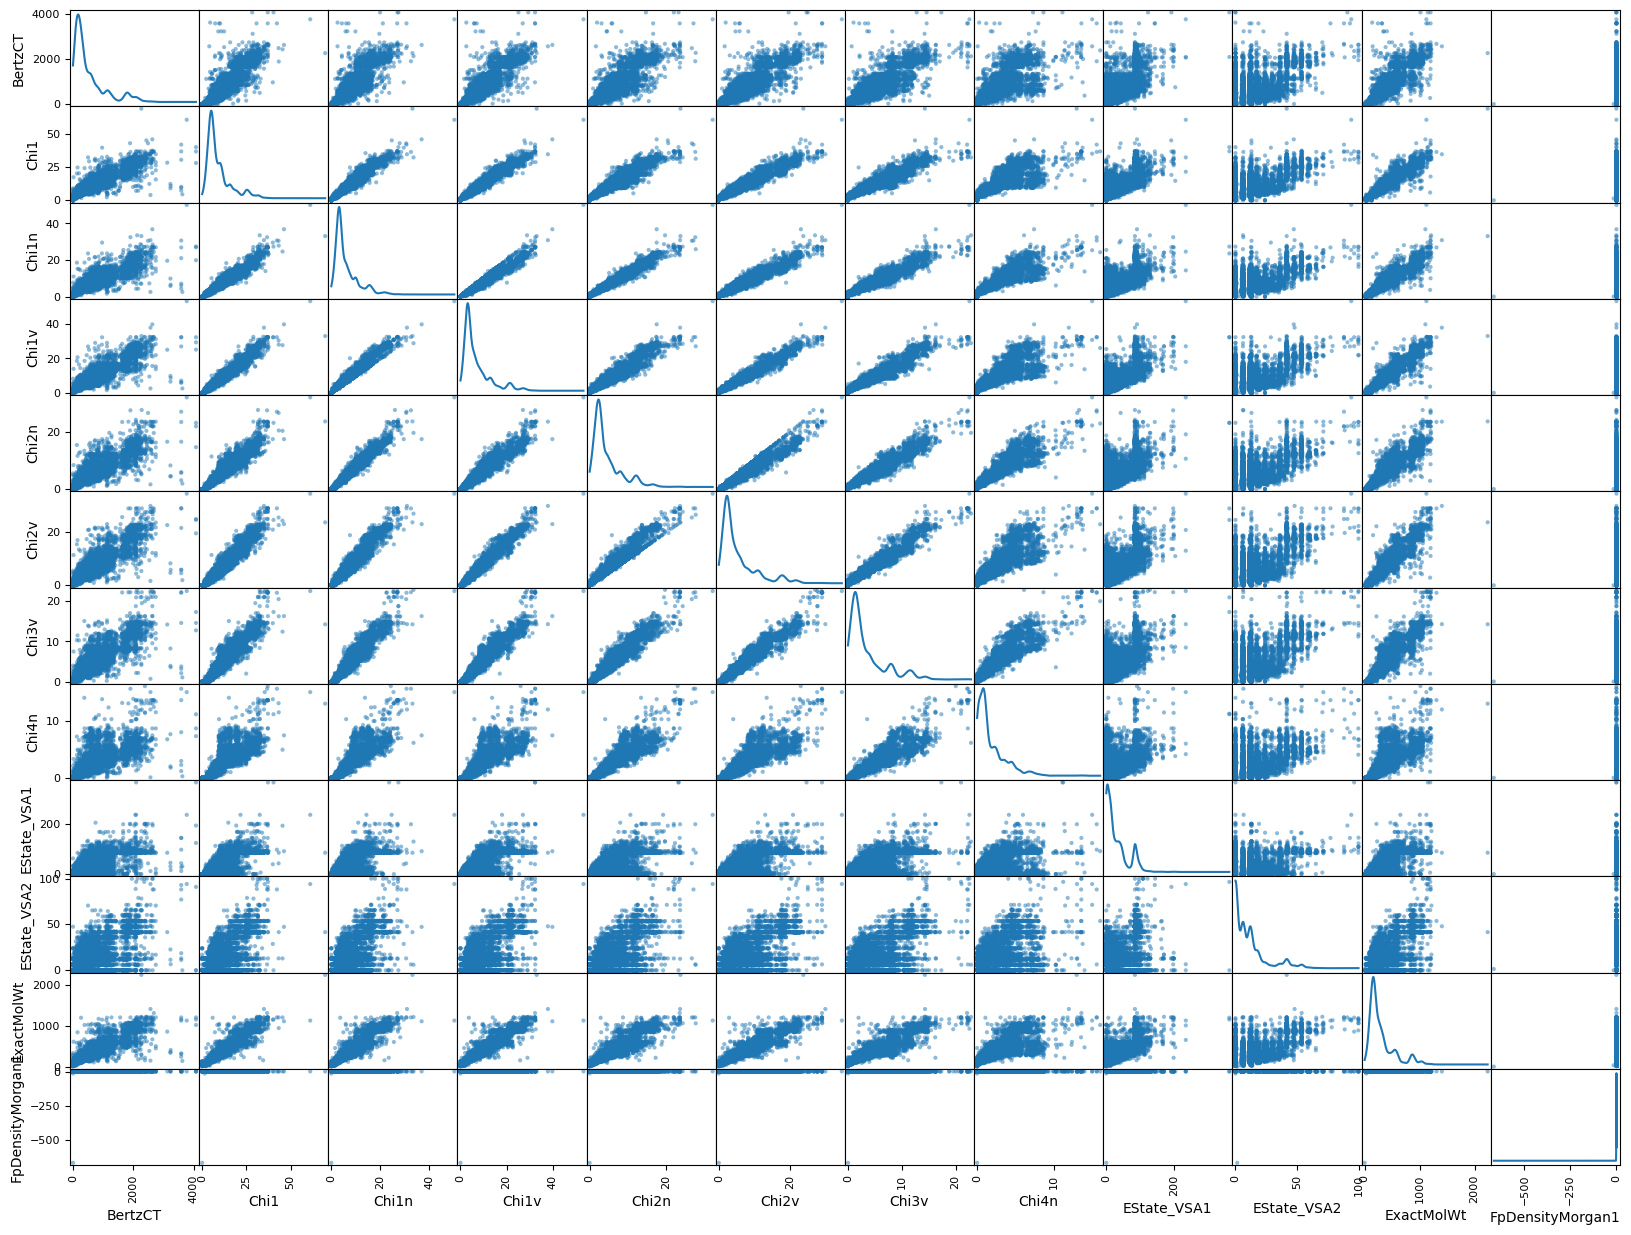

In [7]:
pd.plotting.scatter_matrix(train.loc[:,"BertzCT":"FpDensityMorgan1"], diagonal="kde",figsize=(20,15))
plt.show()

<Axes: >

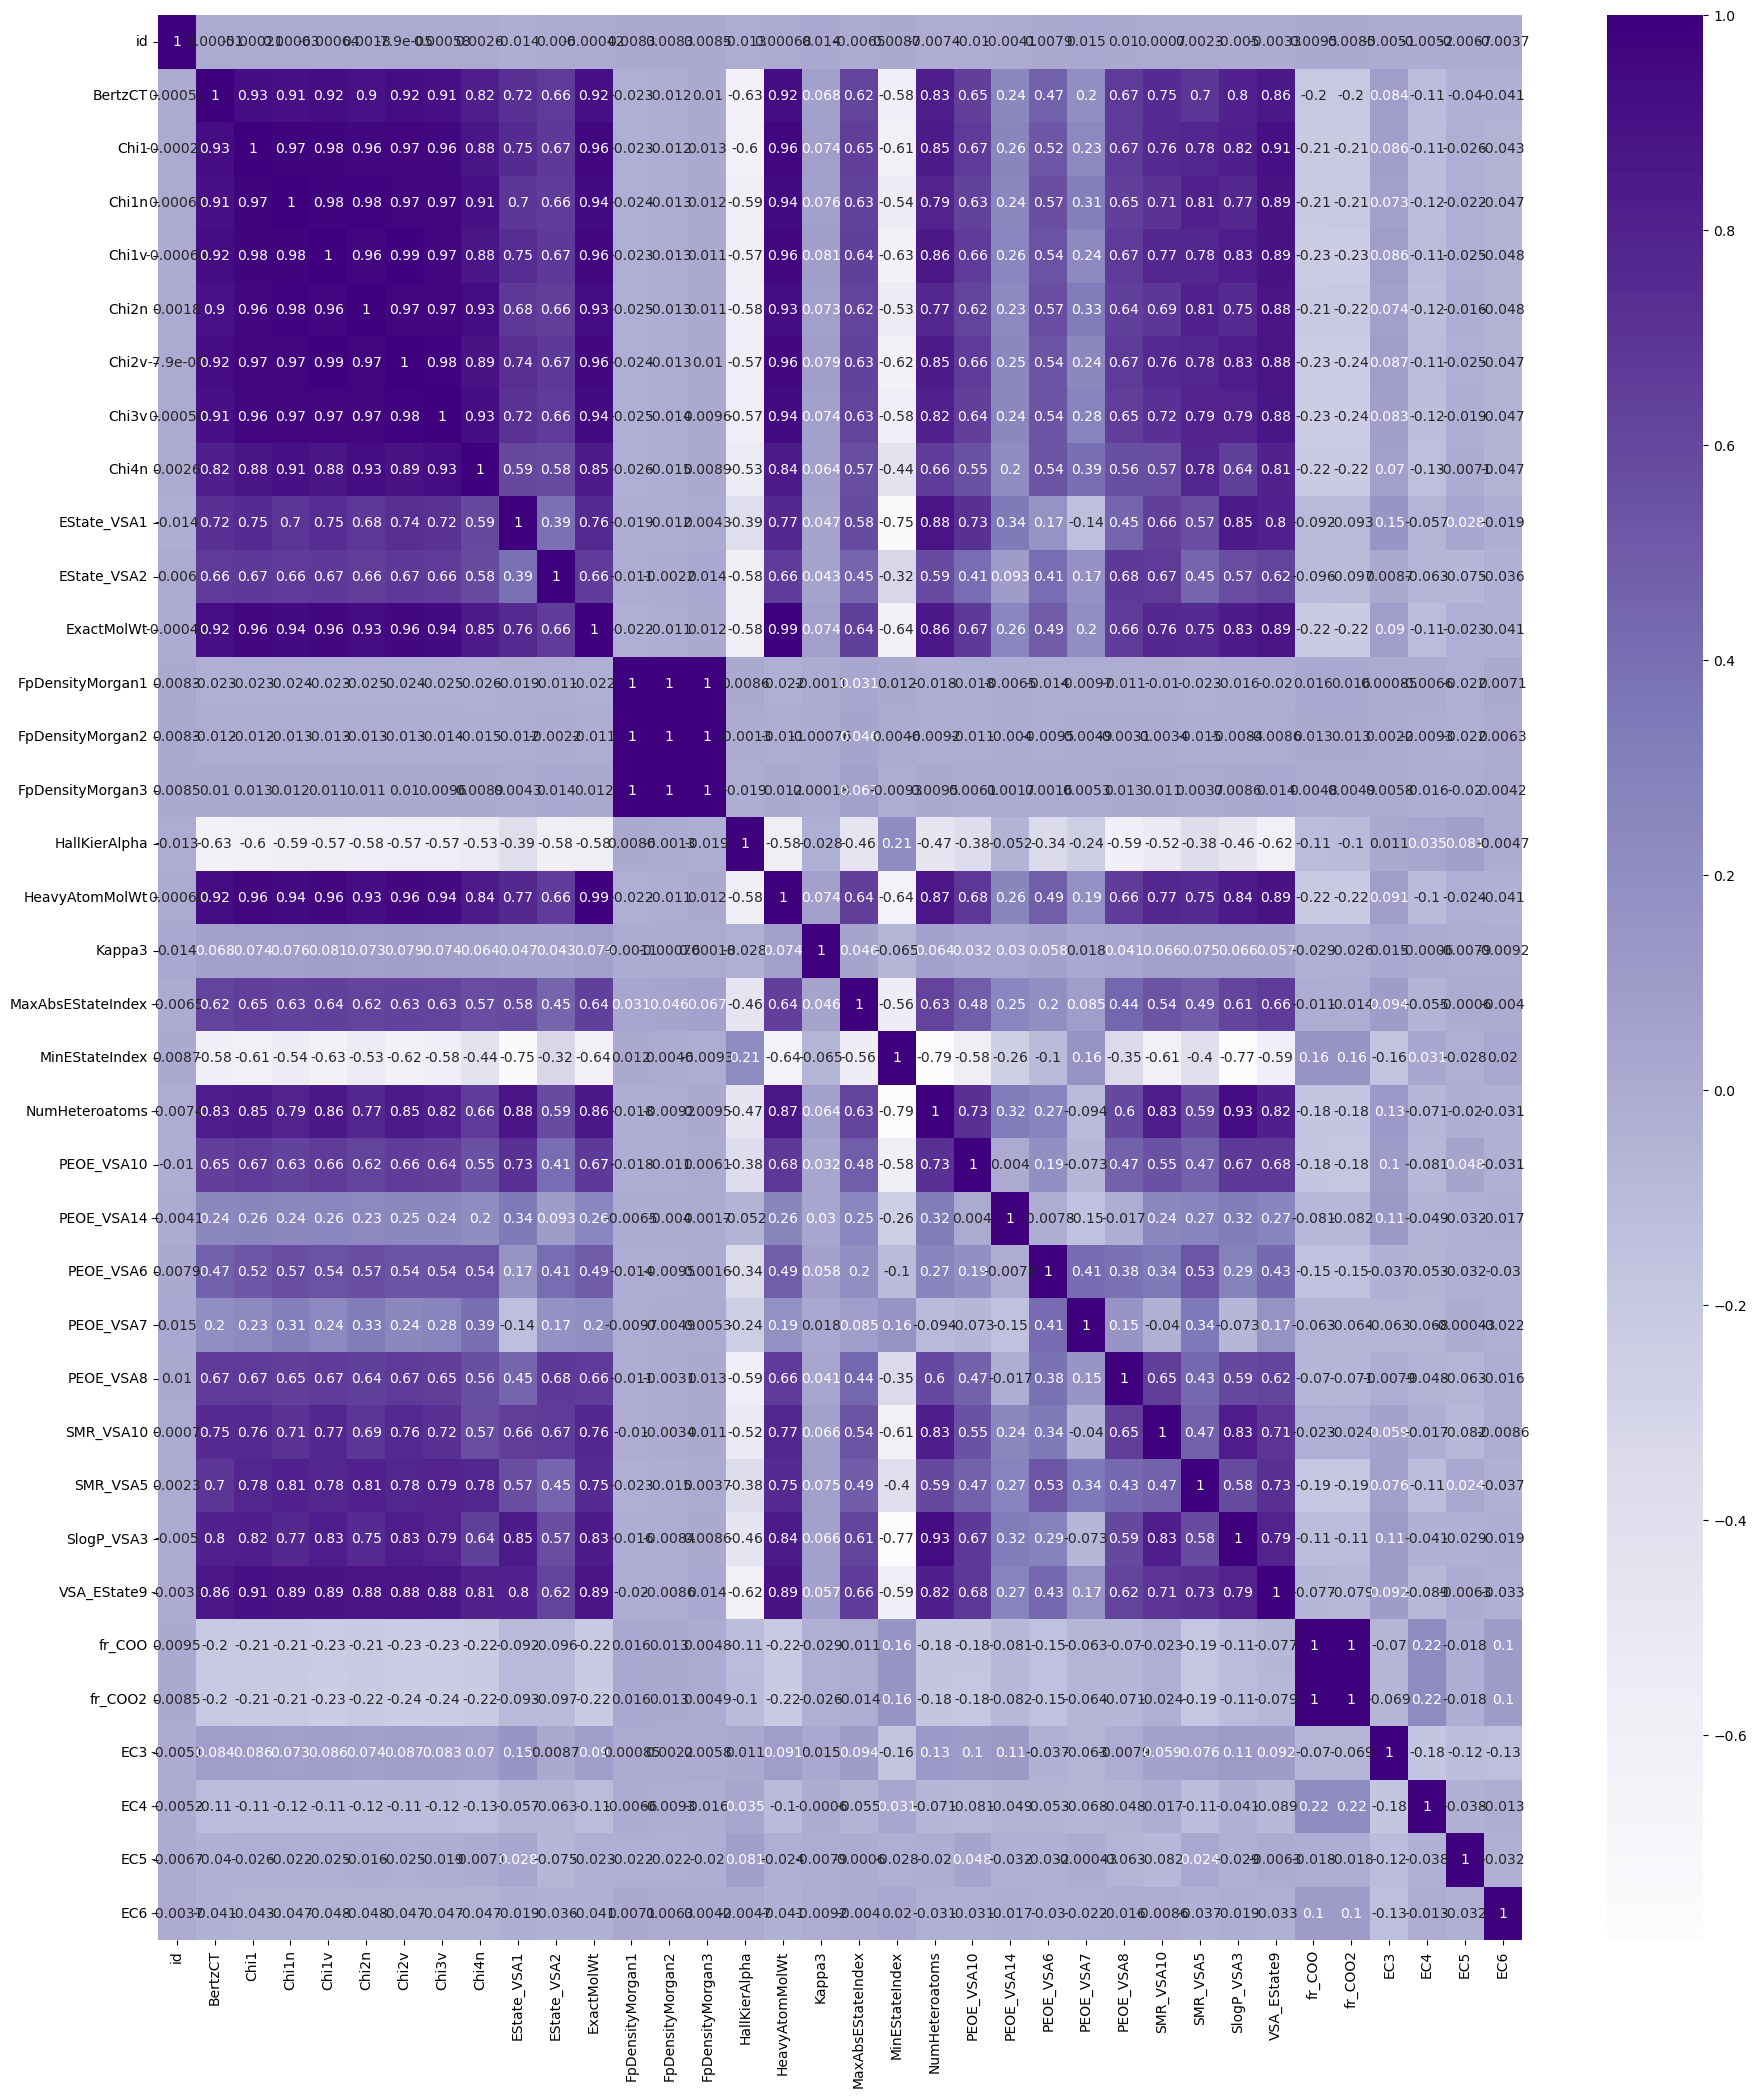

In [8]:
plt.figure(figsize=(22,25))
sns.heatmap(data = train.corr(),annot=True,cmap='Purples',fmt='0.2g')

In [9]:
train.columns

Index(['id', 'BertzCT', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v',
       'Chi4n', 'EState_VSA1', 'EState_VSA2', 'ExactMolWt', 'FpDensityMorgan1',
       'FpDensityMorgan2', 'FpDensityMorgan3', 'HallKierAlpha',
       'HeavyAtomMolWt', 'Kappa3', 'MaxAbsEStateIndex', 'MinEStateIndex',
       'NumHeteroatoms', 'PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA6', 'PEOE_VSA7',
       'PEOE_VSA8', 'SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3', 'VSA_EState9',
       'fr_COO', 'fr_COO2', 'EC3', 'EC4', 'EC5', 'EC6'],
      dtype='object')

# Feature Engineering

In [10]:
drop_train=['id','FpDensityMorgan1','FpDensityMorgan2','BertzCT','ExactMolWt', 'Chi1', 'Chi1n',
       'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v','fr_COO2','EC3', 'EC4', 'EC5', 'EC6']
drop_test = ['id','FpDensityMorgan1','FpDensityMorgan2','BertzCT','ExactMolWt', 'Chi1', 'Chi1n',
       'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v','fr_COO2']

train = train.drop(columns=drop_train)
test = test.drop(columns = drop_test)

In [11]:
def remove_outliers(data):
    
    for feature in data.columns:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3-Q1
        LOWER = Q1 - 3 * IQR
        HIGHER = Q3 + 3 * IQR

        data[feature] = np.where(data[feature] > HIGHER,HIGHER,
                        np.where(data[feature] < LOWER,LOWER,data[feature]))

In [12]:
train_capped = train.copy()
test_capped = test.copy()

#remove_outliers(train_capped)    --- produces better results if outliers are not removed.
#remove_outliers(test_capped)

In [13]:
train.describe()

,Chi4n,EState_VSA1,EState_VSA2,FpDensityMorgan3,HallKierAlpha,HeavyAtomMolWt,Kappa3,MaxAbsEStateIndex,MinEStateIndex,NumHeteroatoms,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO
count,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000
mean,1.773472,29.202823,10.435316,2.255470,-1.207776,274.950211,5.874372,10.556443,-2.119772,8.584108,11.021644,17.790011,8.962440,11.318811,6.704487,15.666766,31.066423,13.636941,49.309959,0.458215
std,1.865898,31.728679,13.651843,5.501200,0.935314,212.678755,45.730226,1.559331,2.066415,7.643769,13.958962,34.561655,19.756727,20.169745,10.865415,18.080208,33.896638,14.598554,29.174824,0.667948
min,0.000000,0.000000,0.000000,-666.000000,-7.730000,0.000000,-104.040000,0.000000,-6.327514,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.430556,0.000000
25%,0.503897,5.969305,0.000000,2.100000,-1.660000,136.109000,1.784008,9.926190,-4.659604,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.969305,6.420822,4.794537,30.000000,0.000000
50%,1.073261,17.353601,6.420822,2.358491,-1.100000,194.276500,3.261011,10.421334,-1.265370,6.000000,6.041841,5.969305,0.000000,0.000000,0.000000,11.752550,20.075376,9.589074,41.666667,0.000000
75%,2.534281,44.876559,12.841643,2.500000,-0.570000,326.002000,5.848400,11.539743,-0.787037,10.000000,18.311899,15.645394,12.132734,13.847474,6.923737,17.721856,42.727765,14.912664,56.090650,1.000000
max,16.072810,363.705954,99.936429,3.400000,0.820000,2035.133000,1512.242231,15.630251,6.000000,42.000000,97.663462,482.434223,375.425148,211.501279,100.348416,80.742293,492.729739,115.406157,384.450519,8.000000


In [14]:
train_capped.describe()

,Chi4n,EState_VSA1,EState_VSA2,FpDensityMorgan3,HallKierAlpha,HeavyAtomMolWt,Kappa3,MaxAbsEStateIndex,MinEStateIndex,NumHeteroatoms,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO
count,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000
mean,1.773472,29.202823,10.435316,2.255470,-1.207776,274.950211,5.874372,10.556443,-2.119772,8.584108,11.021644,17.790011,8.962440,11.318811,6.704487,15.666766,31.066423,13.636941,49.309959,0.458215
std,1.865898,31.728679,13.651843,5.501200,0.935314,212.678755,45.730226,1.559331,2.066415,7.643769,13.958962,34.561655,19.756727,20.169745,10.865415,18.080208,33.896638,14.598554,29.174824,0.667948
min,0.000000,0.000000,0.000000,-666.000000,-7.730000,0.000000,-104.040000,0.000000,-6.327514,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.430556,0.000000
25%,0.503897,5.969305,0.000000,2.100000,-1.660000,136.109000,1.784008,9.926190,-4.659604,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.969305,6.420822,4.794537,30.000000,0.000000
50%,1.073261,17.353601,6.420822,2.358491,-1.100000,194.276500,3.261011,10.421334,-1.265370,6.000000,6.041841,5.969305,0.000000,0.000000,0.000000,11.752550,20.075376,9.589074,41.666667,0.000000
75%,2.534281,44.876559,12.841643,2.500000,-0.570000,326.002000,5.848400,11.539743,-0.787037,10.000000,18.311899,15.645394,12.132734,13.847474,6.923737,17.721856,42.727765,14.912664,56.090650,1.000000
max,16.072810,363.705954,99.936429,3.400000,0.820000,2035.133000,1512.242231,15.630251,6.000000,42.000000,97.663462,482.434223,375.425148,211.501279,100.348416,80.742293,492.729739,115.406157,384.450519,8.000000


<Axes: >

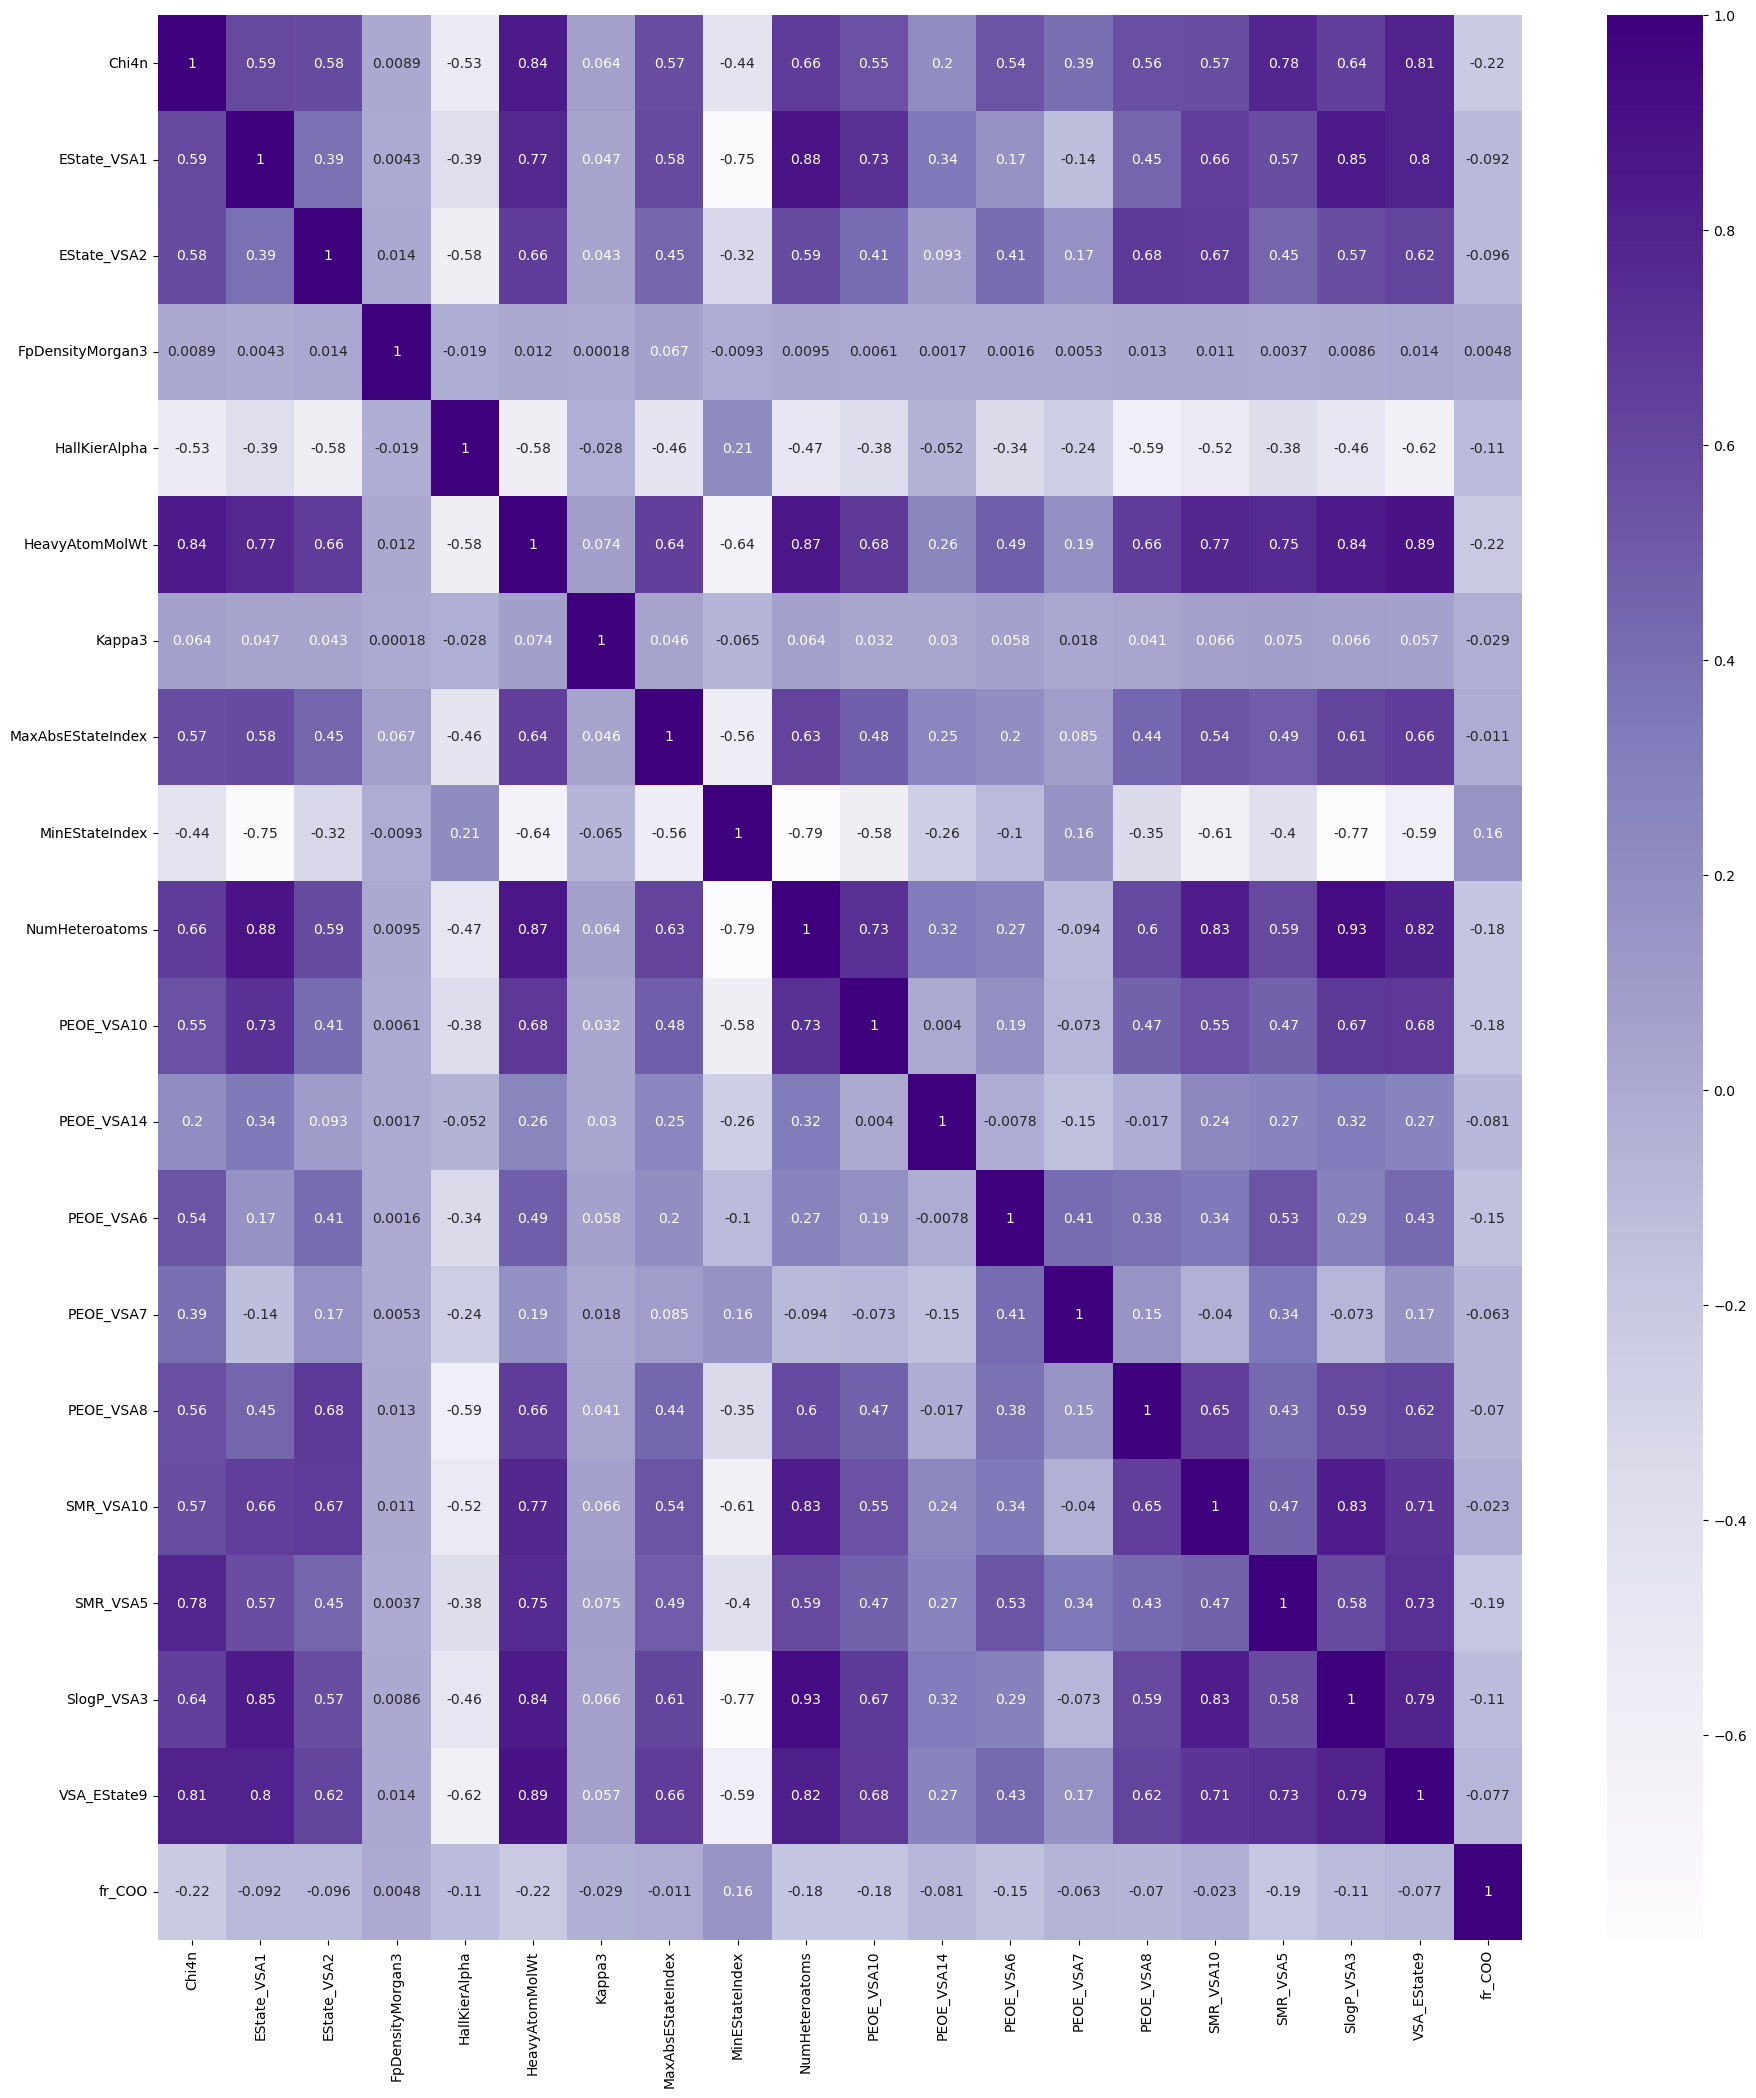

In [15]:
plt.figure(figsize=(22,25))
sns.heatmap(data = train_capped.corr(),annot=True,cmap='Purples',)

In [16]:
display(target.EC1.value_counts())
display(target.EC2.value_counts())  ## Dataset is imbalanced

1    9908
0    4930
Name: EC1, dtype: int64

1    11855
0     2983
Name: EC2, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score,classification_report
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import ADASYN
import xgboost as xgb

# model training

In [18]:
def model_training(classification_model,col):
    
    print("\n\n",classification_model)
        
    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(train_capped,target[col],
                                                    test_size = 0.2, 
                                                    random_state = 22,
                                                    stratify = target[col])
   
    
    ##  print("Before", X_train.shape,y_train.shape)
    ### oversampling the train dataset using SMOTE + Tomek
    ##  ada = ADASYN(random_state=139)
    ##  X_train, y_train = ada.fit_resample (X_train, y_train)
    ##  print("After", X_train.shape,y_train.shape
    
    # Scaling 
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    test_capped = scaler.transform(test)
    
    
    # Model building
    model = classification_model
    model.fit(X_train,y_train)
    y_pred = model.predict_proba(X_test)
    
    print("\n",y_pred[:2],"\n")
    print("r2 score:",r2_score(y_test, y_pred[:,1]))
    print("\n",classification_report(y_test, model.predict(X_test)))
    print('_' * 53)
    
    
    preds = model.predict_proba(test_capped)
    return preds[:,1]

In [19]:
models = {
    '1' : MultinomialNB(),
    '2' : LogisticRegression(),
    '3' : DecisionTreeClassifier(),
    '4' : RandomForestClassifier(),
    '5' : KNeighborsClassifier()
    
}

print('*'* 53)
print("EC1 Predictions")
print('*'* 53)

#model_training(models['1'],'EC1')
model_training(models['2'],'EC1')
model_training(models['3'],'EC1')
model_training(models['4'],'EC1')
model_training(models['5'],'EC1')

print('*'* 53)
print("EC2 Predictions")
print('*'* 53)

#model_training(models['1'],'EC2')
model_training(models['2'],'EC2')
model_training(models['3'],'EC2')
model_training(models['4'],'EC2')
model_training(models['5'],'EC2')

*****************************************************
EC1 Predictions
*****************************************************


 LogisticRegression()

 [[0.5542221  0.4457779 ]
 [0.45413615 0.54586385]] 

r2 score: 0.09626754451248343

               precision    recall  f1-score   support

           0       0.60      0.27      0.37       986
           1       0.71      0.91      0.80      1982

    accuracy                           0.70      2968
   macro avg       0.66      0.59      0.59      2968
weighted avg       0.68      0.70      0.66      2968

_____________________________________________________


 DecisionTreeClassifier()

 [[0. 1.]
 [1. 0.]] 

r2 score: -0.7161289775661823

               precision    recall  f1-score   support

           0       0.43      0.46      0.44       986
           1       0.72      0.70      0.71      1982

    accuracy                           0.62      2968
   macro avg       0.57      0.58      0.58      2968
weighted avg       0.62      

array([0.6, 0.8, 0.6, ..., 0.8, 1. , 0.8])

In [20]:
EC1 = model_training(models['4'],'EC1')
EC2 = model_training(models['2'],'EC2')



 RandomForestClassifier()

 [[0.5  0.5 ]
 [0.37 0.63]] 

r2 score: 0.1051629450059901

               precision    recall  f1-score   support

           0       0.59      0.38      0.46       986
           1       0.74      0.87      0.80      1982

    accuracy                           0.70      2968
   macro avg       0.66      0.62      0.63      2968
weighted avg       0.69      0.70      0.69      2968

_____________________________________________________


 LogisticRegression()

 [[0.19934555 0.80065445]
 [0.15954477 0.84045523]] 

r2 score: 0.0012400714598198581

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       597
           1       0.80      1.00      0.89      2371

    accuracy                           0.80      2968
   macro avg       0.40      0.50      0.44      2968
weighted avg       0.64      0.80      0.71      2968

_____________________________________________________


## Final submission

In [21]:
submission

,id,EC1,EC2
0,14838,0.5,0.5
1,14839,0.5,0.5
2,14840,0.5,0.5
3,14841,0.5,0.5
4,14842,0.5,0.5
...,...,...,...
9888,24726,0.5,0.5
9889,24727,0.5,0.5
9890,24728,0.5,0.5
9891,24729,0.5,0.5


In [22]:
submission['EC1'] = EC1
submission['EC2'] = EC2

In [23]:
submission.to_csv("/kaggle/working/submission.csv",index=False)

# Feel free to customize 👍
## Thanks for viewing.